<div class="alert alert-block alert-success">
    <b><center>CNN Basic Examples</center></b>
    <b><center>RSNET</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, datasets, preprocessing, utils

In [3]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd
import PIL

In [4]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'2.2.0'

# Download Flowers Dataset
This tutorial uses a dataset of about 3,700 photos of flowers. The dataset contains 5 sub-directories, one per class:

In [5]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 5s 0us/step


In [6]:
list(data_dir.glob("*"))

[PosixPath('/home/rsnet/.keras/datasets/flower_photos/roses'),
 PosixPath('/home/rsnet/.keras/datasets/flower_photos/tulips'),
 PosixPath('/home/rsnet/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/home/rsnet/.keras/datasets/flower_photos/sunflowers'),
 PosixPath('/home/rsnet/.keras/datasets/flower_photos/daisy'),
 PosixPath('/home/rsnet/.keras/datasets/flower_photos/dandelion')]

After downloading, you should now have a copy of the dataset available. There are 3,670 total images:

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
category_flower = ["roses", "tulips", "sunflowers", "daisy", "dandelion"]

@interact(category=category_flower)
def preview(category):
    flowers = list(data_dir.glob(f"{category}/*.jpg"))
    print(f"size of flowers: {len(flowers)}")
    
    @interact(idx=(0, len(flowers)-1))
    def showFlower(idx):
        display(PIL.Image.open(flowers[idx]))

interactive(children=(Dropdown(description='category', options=('roses', 'tulips', 'sunflowers', 'daisy', 'dan…

# Prepare Learning Data

Load using keras.preprocessing
> Let's load these images off disk using the helpful image_dataset_from_directory utility. This will take you from a directory of images on disk to a tf.data.Dataset in just a couple lines of code. If you like, you can also write your own data loading code from scratch by visiting the load images tutorial.

In [11]:
import tensorflow_datasets as tfds

In [ ]:
tfds.I

In [10]:
builder = tfds.ImageFolder(data_dir)
print(builder.info)  # num examples, labels... are automatically calculated
ds = builder.as_dataset(split='train', shuffle_files=True)
tfds.show_examples(ds, builder.info)

AttributeError: module 'tensorflow_datasets' has no attribute 'ImageFolder'

In [61]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
preprocessing.image.DirectoryIterator

In [64]:
train_ds = preprocessing.image. .image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

AttributeError: module 'tensorflow.keras.preprocessing' has no attribute 'image_dataset_from_directory'

# Create Model

In [7]:
# Normalize pixel values to be between 0 and 1
train_datas, test_datas = train_datas / 255, test_datas / 255

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

In [8]:
inputs = layers.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

In [9]:
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

In [10]:
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

In [11]:
x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

In [12]:
model = models.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 9, 9, 64)     0           conv2d_1[0][0]                   
_________________________________________________________________________________________

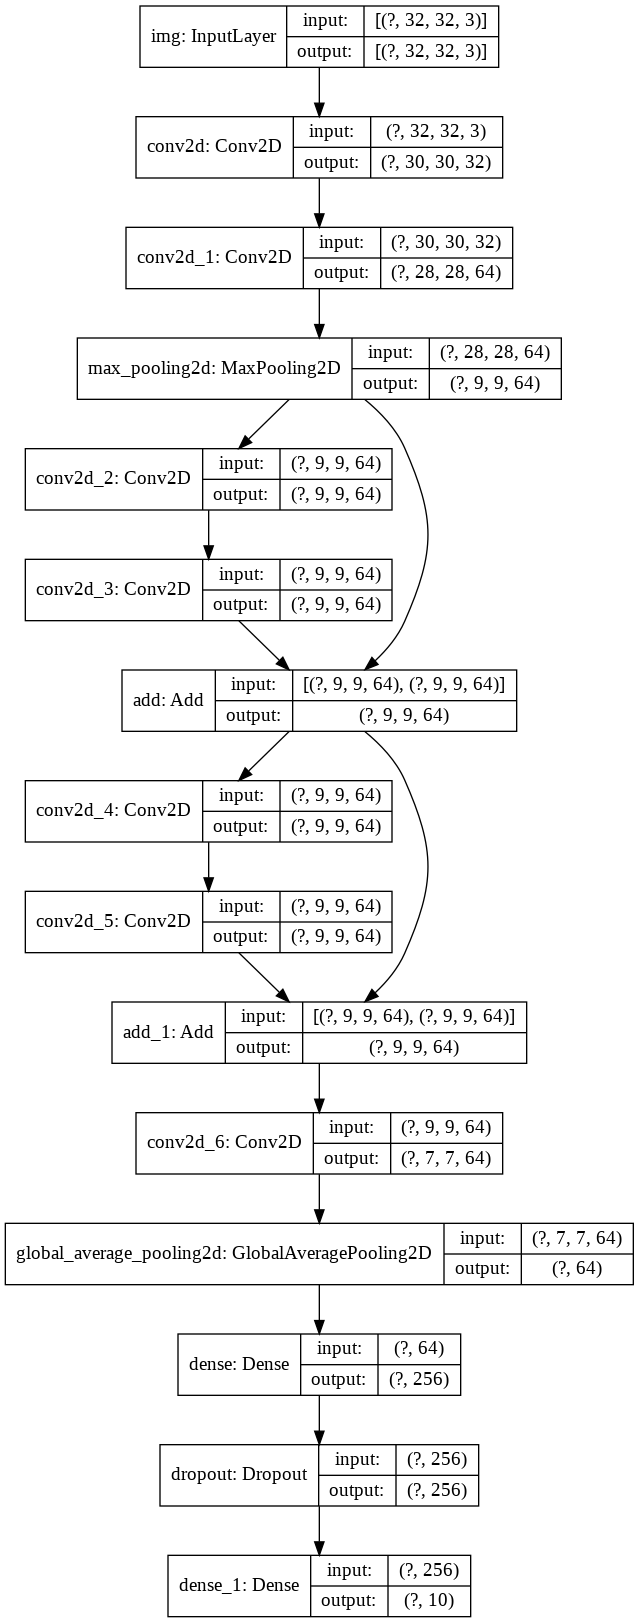

In [13]:
utils.plot_model(model, "intermediate/model.png", True)

In [14]:
model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [15]:
history = model.fit(
    train_datas, train_labels,
    validation_data=(test_datas, test_labels),
    batch_size=256,
    epochs=10
)

Epoch 1/10
196/196 [==============================] - 46s 236ms/step - loss: 1.9132 - accuracy: 0.2499 - val_loss: 1.6216 - val_accuracy: 0.3792
Epoch 2/10
196/196 [==============================] - 47s 239ms/step - loss: 1.5397 - accuracy: 0.4118 - val_loss: 1.4434 - val_accuracy: 0.4618
Epoch 3/10
196/196 [==============================] - 46s 235ms/step - loss: 1.3268 - accuracy: 0.5105 - val_loss: 1.2388 - val_accuracy: 0.5377
Epoch 4/10
196/196 [==============================] - 46s 234ms/step - loss: 1.1683 - accuracy: 0.5776 - val_loss: 1.1010 - val_accuracy: 0.5966
Epoch 5/10
196/196 [==============================] - 47s 242ms/step - loss: 1.0517 - accuracy: 0.6220 - val_loss: 1.0121 - val_accuracy: 0.6317
Epoch 6/10
196/196 [==============================] - 50s 255ms/step - loss: 0.9763 - accuracy: 0.6473 - val_loss: 0.9439 - val_accuracy: 0.6539
Epoch 7/10
196/196 [==============================] - 50s 253ms/step - loss: 0.9062 - accuracy: 0.6765 - val_loss: 0.9753 - val_ac

In [16]:
test_scores = model.evaluate(test_datas, test_labels, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 2s - loss: 0.7573 - accuracy: 0.7289
Test loss: 0.7573119401931763
Test accuracy: 0.7289000153541565


<AxesSubplot:>

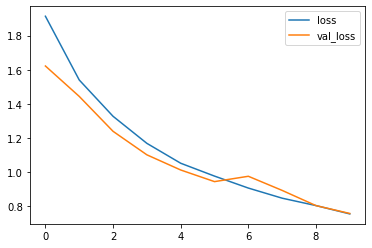

In [17]:
history_df = pd.DataFrame(history.history)
history_df[["loss", "val_loss"]].plot()

<AxesSubplot:>

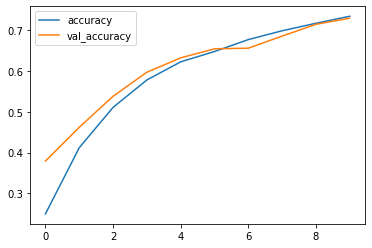

In [18]:
history_df[["accuracy", "val_accuracy"]].plot()

# Save And Serialize

Saving the model and serialization work the same way for models built using the functional API as they do for Sequential models. The standard way to save a functional model is to call model.save() to save the entire model as a single file. You can later recreate the same model from this file, even if the code that built the model is no longer available.

* This saved file includes the:
    - model architecture
    - model weight values (that were learned during training)
    - model training config, if any (as passed to compile)
    - optimizer and its state, if any (to restart training where you left off)

In [19]:
model.save("intermediate/mnist.h5")
del model

In [20]:
# Recreate the exact same model purely from the file:
model = models.load_model("intermediate/mnist.h5")

In [21]:
test_scores = model.evaluate(test_datas, test_labels, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 3s - loss: 0.7573 - accuracy: 0.7289
Test loss: 0.7573119401931763
Test accuracy: 0.7289000153541565
